In [198]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [199]:
churndata = pd.read_csv('/Users/jeronimoperezrocha/Library/Containers/com.microsoft.Excel/Data/Downloads/customer_churn_data.csv')
print(churndata)

     Age  MonthlyCharge  ContractDuration  DataUsage  InternationalPlan  \
0   62.0      53.660533                36   3.064977                  0   
1   65.0      77.232663                36   8.922678                  1   
2   18.0      52.204122                36        NaN                  1   
3   21.0            NaN                12   9.617058                  1   
4   21.0      96.469974                24   5.245764                  1   
..   ...            ...               ...        ...                ...   
95  32.0      90.545331                12   5.391411                  1   
96  33.0      58.797771                12   5.126631                  1   
97  38.0      39.798081                12   5.721334                  1   
98  53.0      32.325567                12   4.978138                  0   
99  41.0      98.780247                24   8.673714                  0   

    Churn (y)  
0           1  
1           1  
2           0  
3           1  
4           1  
.. 

In [200]:
churndata.head() #First Five Rows

,Age,MonthlyCharge,ContractDuration,DataUsage,InternationalPlan,Churn (y)
0,62.0,53.660533,36,3.064977,0,1
1,65.0,77.232663,36,8.922678,1,1
2,18.0,52.204122,36,NaN,1,0
3,21.0,NaN,12,9.617058,1,1
4,21.0,96.469974,24,5.245764,1,1


In [201]:
churndata.describe() #Describe

,Age,MonthlyCharge,ContractDuration,DataUsage,InternationalPlan,Churn (y)
count,90.000000,90.000000,100.00000,90.000000,100.000000,100.000000
mean,41.655556,66.422045,23.04000,5.845470,0.530000,0.500000
std,16.024673,20.456198,9.44727,2.499475,0.501614,0.502519
min,18.000000,30.654969,12.00000,1.036433,0.000000,0.000000
25%,28.250000,50.600849,12.00000,3.787877,0.000000,0.000000
50%,39.500000,65.604954,24.00000,5.761262,1.000000,0.500000
75%,56.000000,83.500612,36.00000,7.915482,1.000000,1.000000
max,69.000000,98.882957,36.00000,9.865291,1.000000,1.000000


In [202]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                90 non-null     float64
 1   MonthlyCharge      90 non-null     float64
 2   ContractDuration   100 non-null    int64  
 3   DataUsage          90 non-null     float64
 4   InternationalPlan  100 non-null    int64  
 5   Churn (y)          100 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 4.8 KB


<Axes: >

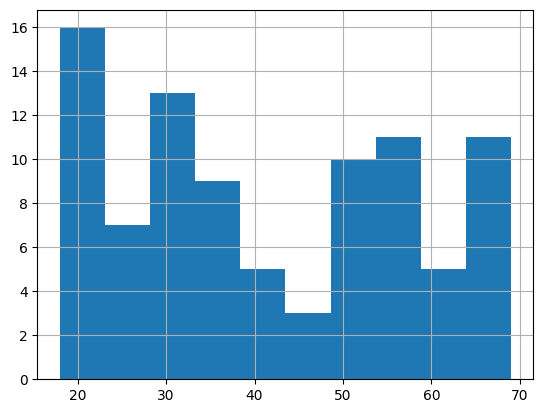

In [203]:
churndata["Age"].hist() #histogram x variable being Age

In [204]:
#reanma colum churn 
churndata.rename(columns={'Churn (y)': 'Churn'}, inplace=True)
print(churndata)

     Age  MonthlyCharge  ContractDuration  DataUsage  InternationalPlan  Churn
0   62.0      53.660533                36   3.064977                  0      1
1   65.0      77.232663                36   8.922678                  1      1
2   18.0      52.204122                36        NaN                  1      0
3   21.0            NaN                12   9.617058                  1      1
4   21.0      96.469974                24   5.245764                  1      1
..   ...            ...               ...        ...                ...    ...
95  32.0      90.545331                12   5.391411                  1      1
96  33.0      58.797771                12   5.126631                  1      1
97  38.0      39.798081                12   5.721334                  1      0
98  53.0      32.325567                12   4.978138                  0      0
99  41.0      98.780247                24   8.673714                  0      0

[100 rows x 6 columns]


In [205]:
churndata[["Age", 'MonthlyCharge', 'ContractDuration', 'DataUsage']].describe()

,Age,MonthlyCharge,ContractDuration,DataUsage
count,90.000000,90.000000,100.00000,90.000000
mean,41.655556,66.422045,23.04000,5.845470
std,16.024673,20.456198,9.44727,2.499475
min,18.000000,30.654969,12.00000,1.036433
25%,28.250000,50.600849,12.00000,3.787877
50%,39.500000,65.604954,24.00000,5.761262
75%,56.000000,83.500612,36.00000,7.915482
max,69.000000,98.882957,36.00000,9.865291


In [206]:
churndata.isnull().sum()

Age                  10
MonthlyCharge        10
ContractDuration      0
DataUsage            10
InternationalPlan     0
Churn                 0
dtype: int64

In [207]:
Age = SimpleImputer(strategy='mean')
churndata['Age'] = Age.fit_transform(churndata[['Age']]) #Replace missing values with the mean

In [208]:
MonthlyCharge = SimpleImputer(strategy='mean')
churndata['MonthlyCharge'] = MonthlyCharge.fit_transform(churndata[['MonthlyCharge']]) #Replace missing values with the mean

In [209]:
DataUsage = SimpleImputer(strategy='mean')
churndata['DataUsage'] = DataUsage.fit_transform(churndata[['DataUsage']]) #Replace missing values with the mean

In [210]:
churndata.isnull().sum()

Age                  0
MonthlyCharge        0
ContractDuration     0
DataUsage            0
InternationalPlan    0
Churn                0
dtype: int64

In [211]:
churndata.head()

,Age,MonthlyCharge,ContractDuration,DataUsage,InternationalPlan,Churn
0,62.0,53.660533,36,3.064977,0,1
1,65.0,77.232663,36,8.922678,1,1
2,18.0,52.204122,36,5.845470,1,0
3,21.0,66.422045,12,9.617058,1,1
4,21.0,96.469974,24,5.245764,1,1


In [212]:
y = churndata.Churn
x = churndata[['Age', 'MonthlyCharge', 'DataUsage', 'ContractDuration','InternationalPlan']]
x.head()


,Age,MonthlyCharge,DataUsage,ContractDuration,InternationalPlan
0,62.0,53.660533,3.064977,36,0
1,65.0,77.232663,8.922678,36,1
2,18.0,52.204122,5.845470,36,1
3,21.0,66.422045,9.617058,12,1
4,21.0,96.469974,5.245764,24,1


In [213]:
x = churndata.drop('Churn', axis=1) #Drop the Churn column, another way to create the x variables axis = 1 means column, axis = 0 means row
y = churndata.Churn
x.head()

,Age,MonthlyCharge,ContractDuration,DataUsage,InternationalPlan
0,62.0,53.660533,36,3.064977,0
1,65.0,77.232663,36,8.922678,1
2,18.0,52.204122,36,5.845470,1
3,21.0,66.422045,12,9.617058,1
4,21.0,96.469974,24,5.245764,1


Split the data into training and testing sets

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) #Split the data into training and testing sets 0.25 means 25% of the data will be used for testing and random_state is the seed for the random number generator

Applying Logistic Regression

In [215]:
#make a fit Logistic Regressio on x_train and y_train

model = LogisticRegression()
model.fit(x_train, y_train) 

LogisticRegression()

In [216]:
#preict based on the model
y_pred = model.predict(x_test)

In [217]:
y_pred #explain

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0])

Model Evaluation

In [218]:
#Accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:
 [[ 5  4]
 [11  5]]


**Applying kNN**

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

In [220]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [221]:
y_pred = model.predict(x_test)

In [222]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0])

In [223]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[5 4]
 [7 9]]


**Applaying SVM**

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

In [226]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [227]:
y_pred = model.predict(x_test)

In [228]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [229]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 9  0]
 [16  0]]


In [244]:
for model in [LogisticRegression(), KNeighborsClassifier(), SVC()]:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(model)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score\n", accuracy_score(y_test, y_pred))
    

LogisticRegression()
Confusion Matrix:
 [[ 5  4]
 [11  5]]
Accuracy Score
 0.4
KNeighborsClassifier()
Confusion Matrix:
 [[5 4]
 [7 9]]
Accuracy Score
 0.56
SVC()
Confusion Matrix:
 [[ 9  0]
 [16  0]]
Accuracy Score
 0.36


Accuracy: 0.36
